In [1]:
import numpy as np 

import tensorflow as tf
import tensorflow_probability as tfp
# -- plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
Mhalo = tf.convert_to_tensor(np.random.uniform(10., 15., 1000), dtype=tf.float32)
siglogm = tf.convert_to_tensor(0.2, dtype=tf.float32)
temperature = 0.5

def Ncen(Mmin): 
    # mean occupation of centrals
    return 0.5 * (1+tf.math.erf((Mhalo - Mmin)/siglogm))

def hod(Mmin): 
    bern = tfp.distributions.RelaxedBernoulli(temperature, probs=Ncen(Mmin))
    return bern.sample()

def numden(Mmin): 
    return sum(hod(Mmin))

(10.0, 15.0)

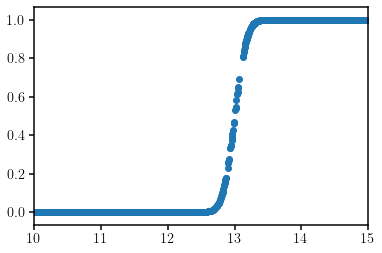

In [3]:
ncen = Ncen(13.0)
plt.scatter(Mhalo, ncen)
plt.xlim(10., 15.)

(10.0, 15.0)

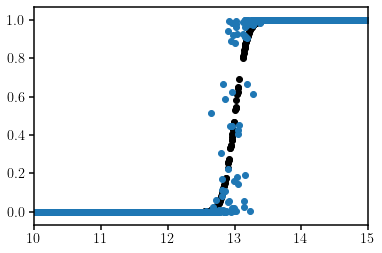

In [4]:
plt.scatter(Mhalo, ncen, c='k')
plt.scatter(Mhalo, hod(13.))
plt.xlim(10., 15.)

In [5]:
Mmin_true = 13.
numden_true = numden(Mmin_true)
print(numden_true)

opt = tf.keras.optimizers.Adam(learning_rate=0.1)

_Mmin = tf.Variable(13.2, trainable=True, dtype=tf.float32)
trainable_variables = [_Mmin]

loss = lambda: tf.math.square(numden_true - numden(_Mmin))
train = opt.minimize(loss, var_list=trainable_variables)
print(_Mmin)

tf.Tensor(434.80634, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan>


In [6]:
for temp in np.linspace(0., 1., 10).astype(np.float32): 
    def _hod(Mmin): 
        bern = tfp.distributions.RelaxedBernoulli(temp, probs=Ncen(Mmin))
        return bern.sample()

    loss = lambda mm: _hod(mm)
    val, grad = tfp.math.value_and_gradient(loss, [_Mmin])
    print(grad)

[<tf.Tensor: id=12590, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=12736, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=12882, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=13028, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=13174, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=13320, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=13466, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=13612, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=13758, shape=(), dtype=float32, numpy=nan>]
[<tf.Tensor: id=13904, shape=(), dtype=float32, numpy=nan>]
